<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN), Logistics Regression , GradientBoostingClassifier, GaussianNB</h3>

# https://medium.com/swlh/churn-prediction-using-machine-learning-25c856201884
#https://towardsdatascience.com/predict-customer-churn-the-right-way-using-pycaret-8ba6541608ac

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [98]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix , classification_report

import seaborn as sn
from sklearn.svm import SVC # "Support vector classifier" 
from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.linear_model import LogisticRegression 

**Load the data**

In [99]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4709,4007-NHVHI,Female,1,No,No,56,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,96.85,5219.65,No
4361,8680-CGLTP,Male,0,No,No,29,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2,No
3311,6137-MFAJN,Female,0,No,No,48,No,No phone service,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,44.80,2104.55,No
6563,6906-ANDWJ,Male,0,Yes,Yes,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.90,1107.25,Yes
1612,3092-IGHWF,Male,0,Yes,Yes,67,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,One year,No,Electronic check,87.40,5918.8,Yes


In [100]:
df.drop('customerID', axis='columns', inplace=True)

In [101]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [102]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [103]:
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [104]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [105]:
df.shape

(7043, 20)

In [106]:
df1=df[df.TotalCharges!=' ']
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [107]:
df1.TotalCharges  = pd.to_numeric(df1.TotalCharges)
df1

C:\Users\Vikki\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [108]:
df[df.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


(array([[ 877.,  259.,  159.,  114.,  102.,   98.,   72.,   70.,   46.,
           72.],
        [ 847.,  476.,  402.,  424.,  371.,  346.,  380.,  425.,  455.,
         1037.]]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 2 Lists of Patches objects>)

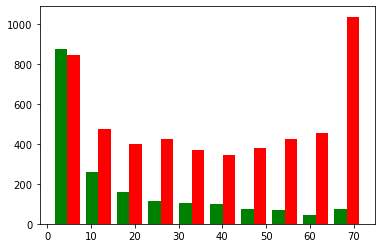

In [109]:
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
tenure_churn_no = df1[df1.Churn=='No'].tenure
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'], label=['churn=yes','churn=no'])

(array([[ 148.,   57.,  119.,  152.,   53.,  350.,  355.,  319.,  273.,
           43.],
        [1452.,  134.,  246.,  485.,  419.,  544.,  597.,  550.,  485.,
          251.]]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 2 Lists of Patches objects>)

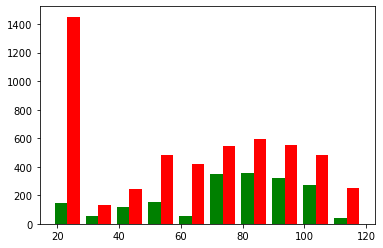

In [110]:
Mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
Mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
plt.hist([Mc_churn_yes, Mc_churn_no], color=['green','red'], label=['churn=yes','churn=no'])

In [111]:
df = df1
def unique_column_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}: {df[column].unique()}')

In [112]:
unique_column_values(df)



gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [113]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [114]:
unique_column_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [115]:

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [116]:
for col in df:
    print(f'{col}:{df[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [117]:

df['gender'].replace({'Female':1,'Male':0},inplace=True)

df.gender.unique()

array([1, 0], dtype=int64)

In [118]:
df2 = pd.get_dummies(data=df, columns=['InternetService', 'PaymentMethod', 'Contract'])

In [119]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
4914,1,0,1,1,72,1,1,1,1,0,...,1,0,0,0,0,0,1,0,0,1
1556,1,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4673,1,1,0,0,25,1,1,1,1,0,...,0,1,0,0,0,0,1,1,0,0
4473,1,1,1,0,26,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [120]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [121]:

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [122]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [123]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,0,0,1,0,1,0
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [124]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X, y)
y_resampled.value_counts()


0    5163
1    5163
Name: Churn, dtype: int64

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=5)

In [126]:
from pandas.api.types import is_numeric_dtype
X_train.shape

(8260, 26)

In [127]:
X_test.shape

(2066, 26)

In [128]:
len(X_test.columns)

26

In [129]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
259/259 [==============================] - 0s 749us/step - loss: 0.5320 - accuracy: 0.7538
Epoch 2/1000
259/259 [==============================] - 0s 676us/step - loss: 0.4663 - accuracy: 0.7822
Epoch 3/1000
259/259 [==============================] - 0s 683us/step - loss: 0.4579 - accuracy: 0.7826
Epoch 4/1000
259/259 [==============================] - 0s 687us/step - loss: 0.4516 - accuracy: 0.7849
Epoch 5/1000
259/259 [==============================] - 0s 703us/step - loss: 0.4477 - accuracy: 0.7870
Epoch 6/1000
259/259 [==============================] - 0s 664us/step - loss: 0.4441 - accuracy: 0.7898
Epoch 7/1000
259/259 [==============================] - 0s 699us/step - loss: 0.4400 - accuracy: 0.7915
Epoch 8/1000
259/259 [==============================] - 0s 664us/step - loss: 0.4367 - accuracy: 0.7956
Epoch 9/1000
259/259 [==============================] - 0s 649us/step - loss: 0.4331 - accuracy: 0.7973
Epoch 10/1000
259/259 [==============================] - 0s 680u

259/259 [==============================] - 0s 757us/step - loss: 0.3378 - accuracy: 0.8536
Epoch 79/1000
259/259 [==============================] - 0s 660us/step - loss: 0.3372 - accuracy: 0.8535
Epoch 80/1000
259/259 [==============================] - 0s 676us/step - loss: 0.3367 - accuracy: 0.8516
Epoch 81/1000
259/259 [==============================] - 0s 703us/step - loss: 0.3377 - accuracy: 0.8527
Epoch 82/1000
259/259 [==============================] - 0s 679us/step - loss: 0.3339 - accuracy: 0.8536
Epoch 83/1000
259/259 [==============================] - 0s 653us/step - loss: 0.3358 - accuracy: 0.8524
Epoch 84/1000
259/259 [==============================] - 0s 646us/step - loss: 0.3348 - accuracy: 0.8533
Epoch 85/1000
259/259 [==============================] - 0s 660us/step - loss: 0.3326 - accuracy: 0.8544
Epoch 86/1000
259/259 [==============================] - 0s 694us/step - loss: 0.3315 - accuracy: 0.8558
Epoch 87/1000
259/259 [==============================] - 0s 689us/ste

259/259 [==============================] - 0s 680us/step - loss: 0.3012 - accuracy: 0.8700
Epoch 156/1000
259/259 [==============================] - 0s 695us/step - loss: 0.3016 - accuracy: 0.8709
Epoch 157/1000
259/259 [==============================] - 0s 730us/step - loss: 0.3042 - accuracy: 0.8672
Epoch 158/1000
259/259 [==============================] - 0s 741us/step - loss: 0.3052 - accuracy: 0.8659
Epoch 159/1000
259/259 [==============================] - 0s 703us/step - loss: 0.3034 - accuracy: 0.8672
Epoch 160/1000
259/259 [==============================] - 0s 668us/step - loss: 0.3035 - accuracy: 0.8706
Epoch 161/1000
259/259 [==============================] - 0s 653us/step - loss: 0.3014 - accuracy: 0.8692
Epoch 162/1000
259/259 [==============================] - 0s 672us/step - loss: 0.3013 - accuracy: 0.8701
Epoch 163/1000
259/259 [==============================] - 0s 695us/step - loss: 0.2996 - accuracy: 0.8697
Epoch 164/1000
259/259 [==============================] - 0s 

259/259 [==============================] - 0s 741us/step - loss: 0.2836 - accuracy: 0.8772
Epoch 232/1000
259/259 [==============================] - 0s 695us/step - loss: 0.2829 - accuracy: 0.8770
Epoch 233/1000
259/259 [==============================] - 0s 726us/step - loss: 0.2830 - accuracy: 0.8778
Epoch 234/1000
259/259 [==============================] - 0s 668us/step - loss: 0.2805 - accuracy: 0.8777
Epoch 235/1000
259/259 [==============================] - 0s 691us/step - loss: 0.2866 - accuracy: 0.8743
Epoch 236/1000
259/259 [==============================] - 0s 722us/step - loss: 0.2855 - accuracy: 0.8758
Epoch 237/1000
259/259 [==============================] - 0s 703us/step - loss: 0.2840 - accuracy: 0.8776
Epoch 238/1000
259/259 [==============================] - 0s 668us/step - loss: 0.2801 - accuracy: 0.8785
Epoch 239/1000
259/259 [==============================] - 0s 718us/step - loss: 0.2830 - accuracy: 0.8742
Epoch 240/1000
259/259 [==============================] - 0s 

259/259 [==============================] - 0s 722us/step - loss: 0.2759 - accuracy: 0.8787
Epoch 308/1000
259/259 [==============================] - 0s 714us/step - loss: 0.2731 - accuracy: 0.8837
Epoch 309/1000
259/259 [==============================] - 0s 710us/step - loss: 0.2734 - accuracy: 0.8812
Epoch 310/1000
259/259 [==============================] - 0s 667us/step - loss: 0.2746 - accuracy: 0.8809
Epoch 311/1000
259/259 [==============================] - 0s 718us/step - loss: 0.2705 - accuracy: 0.8811
Epoch 312/1000
259/259 [==============================] - 0s 710us/step - loss: 0.2737 - accuracy: 0.8835
Epoch 313/1000
259/259 [==============================] - 0s 668us/step - loss: 0.2758 - accuracy: 0.8823
Epoch 314/1000
259/259 [==============================] - 0s 711us/step - loss: 0.2705 - accuracy: 0.8818
Epoch 315/1000
259/259 [==============================] - 0s 695us/step - loss: 0.2689 - accuracy: 0.8811
Epoch 316/1000
259/259 [==============================] - 0s 

259/259 [==============================] - 0s 734us/step - loss: 0.2644 - accuracy: 0.8874
Epoch 384/1000
259/259 [==============================] - 0s 676us/step - loss: 0.2650 - accuracy: 0.8863
Epoch 385/1000
259/259 [==============================] - 0s 672us/step - loss: 0.2627 - accuracy: 0.8879
Epoch 386/1000
259/259 [==============================] - 0s 730us/step - loss: 0.2639 - accuracy: 0.8858
Epoch 387/1000
259/259 [==============================] - 0s 714us/step - loss: 0.2611 - accuracy: 0.8866
Epoch 388/1000
259/259 [==============================] - 0s 726us/step - loss: 0.2672 - accuracy: 0.8846
Epoch 389/1000
259/259 [==============================] - 0s 672us/step - loss: 0.2606 - accuracy: 0.8858
Epoch 390/1000
259/259 [==============================] - 0s 788us/step - loss: 0.2617 - accuracy: 0.8855
Epoch 391/1000
259/259 [==============================] - 0s 822us/step - loss: 0.2606 - accuracy: 0.8862
Epoch 392/1000
259/259 [==============================] - 0s 

259/259 [==============================] - 0s 699us/step - loss: 0.2589 - accuracy: 0.8877
Epoch 460/1000
259/259 [==============================] - 0s 668us/step - loss: 0.2607 - accuracy: 0.8851
Epoch 461/1000
259/259 [==============================] - 0s 734us/step - loss: 0.2556 - accuracy: 0.8887
Epoch 462/1000
259/259 [==============================] - 0s 687us/step - loss: 0.2532 - accuracy: 0.8900
Epoch 463/1000
259/259 [==============================] - 0s 726us/step - loss: 0.2582 - accuracy: 0.8866
Epoch 464/1000
259/259 [==============================] - 0s 718us/step - loss: 0.2558 - accuracy: 0.8910
Epoch 465/1000
259/259 [==============================] - 0s 761us/step - loss: 0.2559 - accuracy: 0.8936
Epoch 466/1000
259/259 [==============================] - 0s 737us/step - loss: 0.2552 - accuracy: 0.8892
Epoch 467/1000
259/259 [==============================] - 0s 703us/step - loss: 0.2601 - accuracy: 0.8886
Epoch 468/1000
259/259 [==============================] - 0s 

259/259 [==============================] - 0s 676us/step - loss: 0.2534 - accuracy: 0.8904
Epoch 536/1000
259/259 [==============================] - 0s 664us/step - loss: 0.2532 - accuracy: 0.8920
Epoch 537/1000
259/259 [==============================] - 0s 676us/step - loss: 0.2543 - accuracy: 0.8947
Epoch 538/1000
259/259 [==============================] - 0s 737us/step - loss: 0.2507 - accuracy: 0.8923
Epoch 539/1000
259/259 [==============================] - 0s 788us/step - loss: 0.2498 - accuracy: 0.8912
Epoch 540/1000
259/259 [==============================] - 0s 703us/step - loss: 0.2493 - accuracy: 0.8924
Epoch 541/1000
259/259 [==============================] - 0s 680us/step - loss: 0.2517 - accuracy: 0.8924
Epoch 542/1000
259/259 [==============================] - 0s 680us/step - loss: 0.2523 - accuracy: 0.8927
Epoch 543/1000
259/259 [==============================] - 0s 695us/step - loss: 0.2507 - accuracy: 0.8929
Epoch 544/1000
259/259 [==============================] - 0s 

259/259 [==============================] - 0s 741us/step - loss: 0.2468 - accuracy: 0.8938
Epoch 613/1000
259/259 [==============================] - 0s 676us/step - loss: 0.2477 - accuracy: 0.8930
Epoch 614/1000
259/259 [==============================] - 0s 775us/step - loss: 0.2453 - accuracy: 0.8944
Epoch 615/1000
259/259 [==============================] - 0s 733us/step - loss: 0.2467 - accuracy: 0.89360s - loss: 0.2527 - accuracy: 
Epoch 616/1000
259/259 [==============================] - 0s 687us/step - loss: 0.2462 - accuracy: 0.8949
Epoch 617/1000
259/259 [==============================] - 0s 717us/step - loss: 0.2464 - accuracy: 0.8960
Epoch 618/1000
259/259 [==============================] - 0s 664us/step - loss: 0.2445 - accuracy: 0.8946
Epoch 619/1000
259/259 [==============================] - 0s 676us/step - loss: 0.2480 - accuracy: 0.8947
Epoch 620/1000
259/259 [==============================] - 0s 706us/step - loss: 0.2475 - accuracy: 0.8942
Epoch 621/1000
259/259 [=======

259/259 [==============================] - 0s 731us/step - loss: 0.2451 - accuracy: 0.8973
Epoch 688/1000
259/259 [==============================] - 0s 689us/step - loss: 0.2433 - accuracy: 0.8959
Epoch 689/1000
259/259 [==============================] - 0s 768us/step - loss: 0.2411 - accuracy: 0.8975
Epoch 690/1000
259/259 [==============================] - 0s 765us/step - loss: 0.2487 - accuracy: 0.8924
Epoch 691/1000
259/259 [==============================] - 0s 660us/step - loss: 0.2479 - accuracy: 0.8938
Epoch 692/1000
259/259 [==============================] - 0s 679us/step - loss: 0.2409 - accuracy: 0.8975
Epoch 693/1000
259/259 [==============================] - 0s 728us/step - loss: 0.2453 - accuracy: 0.8939
Epoch 694/1000
259/259 [==============================] - 0s 718us/step - loss: 0.2455 - accuracy: 0.89590s - loss: 0.2434 - accuracy: 0.
Epoch 695/1000
259/259 [==============================] - 0s 751us/step - loss: 0.2421 - accuracy: 0.8981
Epoch 696/1000
259/259 [=====

259/259 [==============================] - 0s 714us/step - loss: 0.2428 - accuracy: 0.8988
Epoch 764/1000
259/259 [==============================] - 0s 788us/step - loss: 0.2460 - accuracy: 0.8952
Epoch 765/1000
259/259 [==============================] - 0s 714us/step - loss: 0.2421 - accuracy: 0.8956
Epoch 766/1000
259/259 [==============================] - 0s 672us/step - loss: 0.2374 - accuracy: 0.8985
Epoch 767/1000
259/259 [==============================] - 0s 695us/step - loss: 0.2395 - accuracy: 0.8981
Epoch 768/1000
259/259 [==============================] - 0s 703us/step - loss: 0.2433 - accuracy: 0.8998
Epoch 769/1000
259/259 [==============================] - 0s 710us/step - loss: 0.2403 - accuracy: 0.8996
Epoch 770/1000
259/259 [==============================] - 0s 718us/step - loss: 0.2422 - accuracy: 0.9012
Epoch 771/1000
259/259 [==============================] - 0s 687us/step - loss: 0.2374 - accuracy: 0.8996
Epoch 772/1000
259/259 [==============================] - 0s 

259/259 [==============================] - 0s 776us/step - loss: 0.2373 - accuracy: 0.9019
Epoch 840/1000
259/259 [==============================] - 0s 780us/step - loss: 0.2383 - accuracy: 0.90020s - loss: 0.2514 - accuracy: 
Epoch 841/1000
259/259 [==============================] - 0s 691us/step - loss: 0.2432 - accuracy: 0.8973
Epoch 842/1000
259/259 [==============================] - 0s 683us/step - loss: 0.2354 - accuracy: 0.9033
Epoch 843/1000
259/259 [==============================] - 0s 730us/step - loss: 0.2361 - accuracy: 0.9005
Epoch 844/1000
259/259 [==============================] - 0s 676us/step - loss: 0.2348 - accuracy: 0.9025
Epoch 845/1000
259/259 [==============================] - 0s 707us/step - loss: 0.2390 - accuracy: 0.90240s - loss: 0.2388 - accuracy: 0.
Epoch 846/1000
259/259 [==============================] - 0s 730us/step - loss: 0.2404 - accuracy: 0.8976
Epoch 847/1000
259/259 [==============================] - 0s 691us/step - loss: 0.2409 - accuracy: 0.8984

259/259 [==============================] - 0s 726us/step - loss: 0.2365 - accuracy: 0.9023
Epoch 916/1000
259/259 [==============================] - 0s 668us/step - loss: 0.2357 - accuracy: 0.9024
Epoch 917/1000
259/259 [==============================] - 0s 683us/step - loss: 0.2403 - accuracy: 0.8990
Epoch 918/1000
259/259 [==============================] - 0s 660us/step - loss: 0.2375 - accuracy: 0.9004
Epoch 919/1000
259/259 [==============================] - 0s 680us/step - loss: 0.2359 - accuracy: 0.9017
Epoch 920/1000
259/259 [==============================] - 0s 664us/step - loss: 0.2377 - accuracy: 0.9002
Epoch 921/1000
259/259 [==============================] - 0s 695us/step - loss: 0.2371 - accuracy: 0.9022
Epoch 922/1000
259/259 [==============================] - 0s 811us/step - loss: 0.2356 - accuracy: 0.9015
Epoch 923/1000
259/259 [==============================] - 0s 672us/step - loss: 0.2367 - accuracy: 0.9001
Epoch 924/1000
259/259 [==============================] - 0s 

259/259 [==============================] - 0s 710us/step - loss: 0.2325 - accuracy: 0.9036
Epoch 992/1000
259/259 [==============================] - 0s 714us/step - loss: 0.2344 - accuracy: 0.9030
Epoch 993/1000
259/259 [==============================] - 0s 699us/step - loss: 0.2377 - accuracy: 0.8967
Epoch 994/1000
259/259 [==============================] - 0s 687us/step - loss: 0.2352 - accuracy: 0.8994
Epoch 995/1000
259/259 [==============================] - 0s 699us/step - loss: 0.2381 - accuracy: 0.9011
Epoch 996/1000
259/259 [==============================] - 0s 703us/step - loss: 0.2347 - accuracy: 0.9011
Epoch 997/1000
259/259 [==============================] - 0s 680us/step - loss: 0.2352 - accuracy: 0.9013
Epoch 998/1000
259/259 [==============================] - 0s 695us/step - loss: 0.2344 - accuracy: 0.9025
Epoch 999/1000
259/259 [==============================] - 0s 695us/step - loss: 0.2342 - accuracy: 0.9030
Epoch 1000/1000
259/259 [==============================] - 0s

In [130]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 523us/step - loss: 0.6871 - accuracy: 0.8001


[0.687064528465271, 0.8000968098640442]

In [131]:
yp = model.predict(X_test)
yp[:5]

array([[7.9316694e-01],
       [1.2423915e-01],
       [9.6278918e-01],
       [2.6720226e-01],
       [3.6446922e-19]], dtype=float32)

In [132]:
y_pred = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [133]:
y_pred[:10]

[1, 0, 1, 0, 0, 1, 0, 0, 0, 0]

In [134]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1025
           1       0.80      0.81      0.80      1041

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



Text(69.0, 0.5, 'Truth')

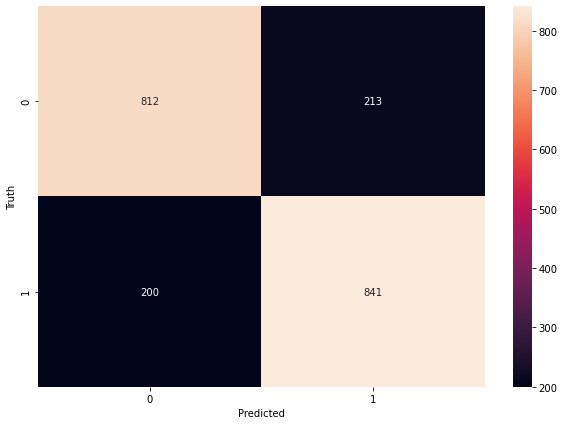

In [135]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [136]:
#Fitting Logistic Regression to the training set  
 
classifierLR= LogisticRegression(random_state=0)  
classifierLR.fit(X_train, y_train)  
y_pred = classifierLR.predict(X_test)
y_pred[:10]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1025
           1       0.78      0.82      0.80      1041

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



C:\Users\Vikki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
#Fitting Decision Tree classifier to the training set  

classifierRF= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifierRF.fit(X_train, y_train)  
y_pred = classifierRF.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1025
           1       0.81      0.81      0.81      1041

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



In [138]:
# Fitting Naive Bayes to the Training set  

classifierGaussianNB = GaussianNB()  
classifierGaussianNB.fit(X_train, y_train)  
# Predicting the Test set results  
y_pred = classifierGaussianNB.predict(X_test)  
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1025
           1       0.74      0.80      0.77      1041

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



In [139]:

classifierSVC = SVC(kernel='linear', random_state=0)  
classifierSVC.fit(X_train, y_train)  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
# Predicting the Test set results  
y_pred = classifierSVC.predict(X_test)  
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1025
           1       0.78      0.82      0.80      1041

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



In [140]:
# Fitting Naive Bayes to the Training set  

classifierGaussianNB = GaussianNB()  
classifierGaussianNB.fit(X_train, y_train)  
# Predicting the Test set results  
y_pred = classifierGaussianNB.predict(X_test)  
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1025
           1       0.74      0.80      0.77      1041

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



In [141]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
clf_forest = GradientBoostingClassifier()
clf_forest.fit(X_train, y_train)
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)


0.8196125907990315

In [143]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

C:\Users\Vikki\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8180058083252663
